<a href="https://githubtocolab.com/borislevant/cvplayground/blob/main/segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

In [23]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage import data, segmentation, color
from skimage.filters import gaussian, threshold_otsu


fatal: destination path 'images' already exists and is not an empty directory.


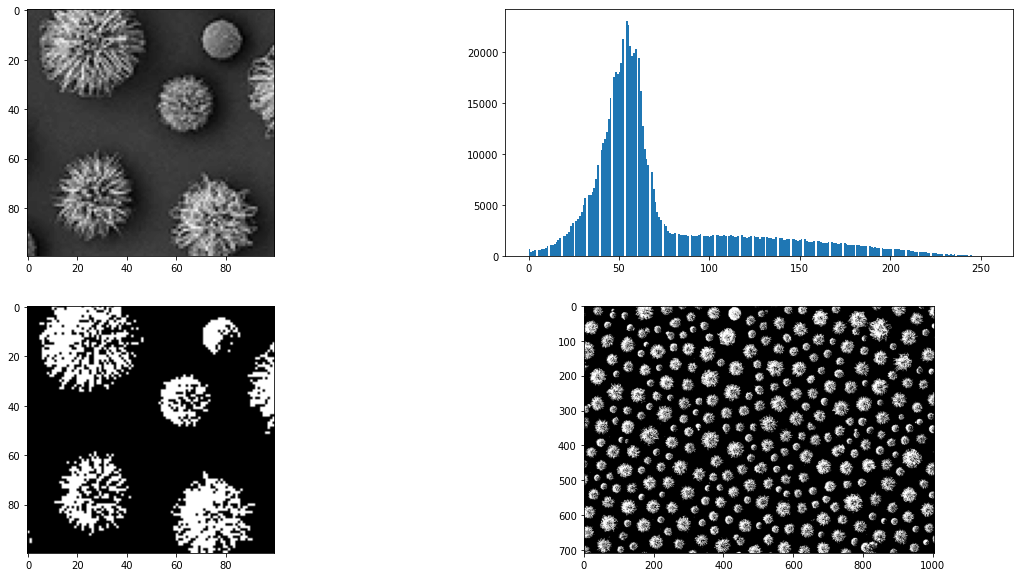

In [25]:
!git clone https://github.com/borislevant/documentscan/ images
img = cv2.imread(r'images/imgs/cryptococcus_big.tif', cv2.IMREAD_GRAYSCALE)
p1 = 100
p2 = 200
nbins = 256

t1 = threshold_otsu(img, nbins=nbins)
img_th = img.copy()
img_th[img_th <= t1] = 0
img_th[img_th > t1] = 255
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
ax[0, 0].imshow(img[p1:p2, p1:p2], cmap='gray')
ax[0, 1].hist(img.flatten(), bins=nbins)
ax[1, 0].imshow(img_th[p1:p2, p1:p2], cmap='gray')
ax[1, 1].imshow(img_th, cmap='gray')
plt.show()

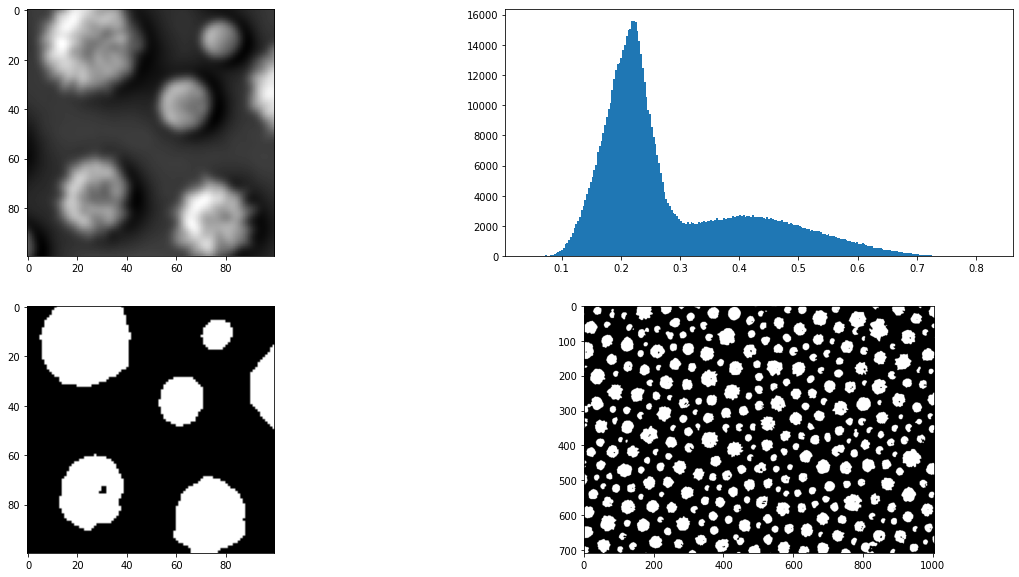

In [26]:
blurred_image = gaussian(img, sigma=2)

t2 = threshold_otsu(blurred_image, nbins=nbins)
img_th2 = blurred_image.copy()
img_th2[img_th2 <= t2] = 0
img_th2[img_th2 > t2] = 255
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
ax[0, 0].imshow(blurred_image[p1:p2, p1:p2], cmap='gray')
ax[0, 1].hist(blurred_image.flatten(), bins=nbins)
ax[1, 0].imshow(img_th2[p1:p2, p1:p2], cmap='gray')
ax[1, 1].imshow(img_th2, cmap='gray')
plt.show()


In [ ]:
t1 = threshold_otsu()

In [ ]:
labels1 = segmentation.slic(img, compactness=30, n_segments=400, start_label=1)
out1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)
